# Faceting in Two Directions
We aren't limited with shape, color, and size, we can also perform faceting!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('fuel-econ.csv')
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])
df.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


we saw how `FacetGrid` could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were **univariate** before, we can actually use any plot type, allowing you to facet **bivariate plots** to create a **multivariate visualization**.

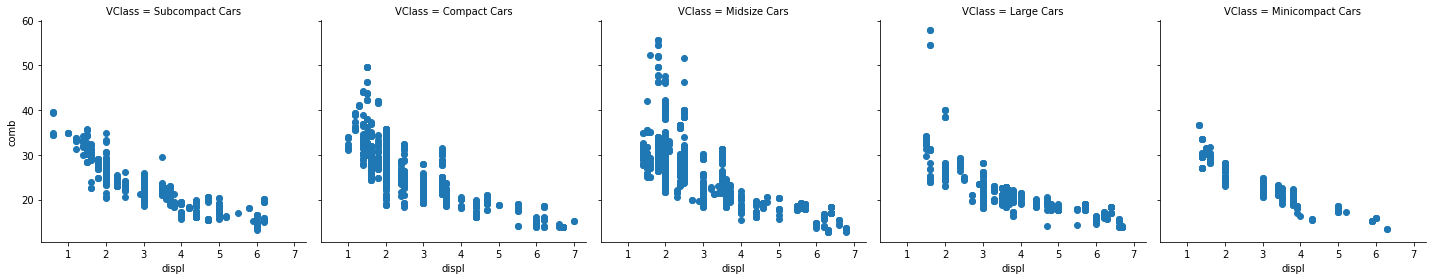

In [3]:
g = sb.FacetGrid(data = df, col = 'VClass', height = 4)
g.map(plt.scatter, 'displ', 'comb');

`FacetGrid` also allows for faceting a variable not just **by columns**, but also **by rows**. We can set one categorical variable on each of the two facet axes for one additional method of depicting **multivariate trends**.

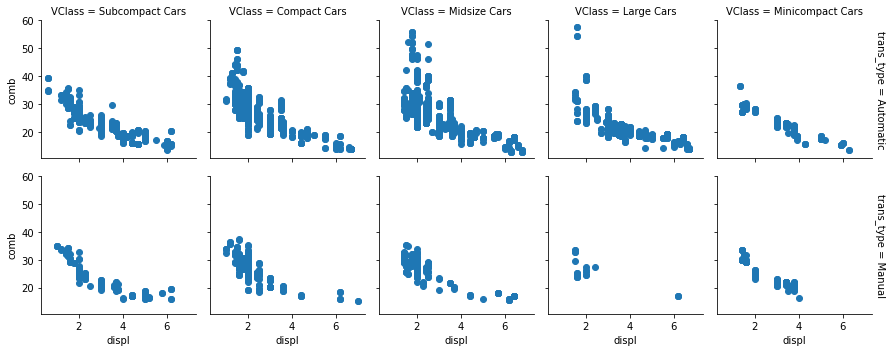

In [4]:
g = sb.FacetGrid(data = df, col = 'VClass', row = 'trans_type', height = 2.5,
                margin_titles = True)#better view; 
                #labels are placed separately on top & right margins
g.map(plt.scatter, 'displ', 'comb');

# Other Adaptations of Bivariate Plots

We also saw one other way of expanding **univariate plots** into **bivariate plots** in the previous lesson: substituting count on a `bar chart` or `histogram` for the mean, median, or some other statistic of a second variable. 

This adaptation can also be done for **bivariate plots** like the `heat map`, `clustered bar chart`, and `line plot`, to allow them to depict **multivariate relationships**.

# Possible approaches
## Bar plot
for two **categorical variables** and one **numeric variable** is to adapt a `clustered bar chart` using the `barplot` function instead of the `countplot` function:

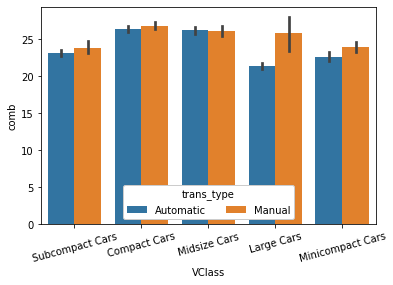

In [5]:
ax = sb.barplot(data = df, x = 'VClass', y = 'comb', hue = 'trans_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'trans_type')
plt.xticks(rotation=15);

## Point plot 

The `hue` parameter can also be used in a similar fashion in the `boxplot`, `violinplot`, and `pointplot` functions to add a categorical third variable to those plots in a clustered fashion.

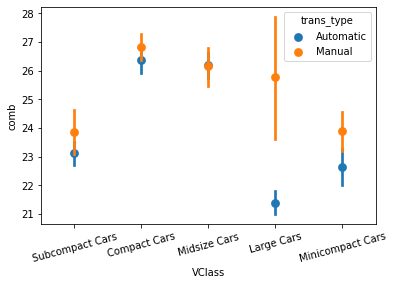

In [6]:
ax = sb.pointplot(data = df, x = 'VClass', y = 'comb', hue = 'trans_type',
                  linestyles = "")
plt.xticks(rotation=15);

As a special note for `pointplot`, the default rendering aligns all levels of the `hue` categorical variable vertically. So, we use the `dodge` parameter to shift the levels in a clustered fashion:

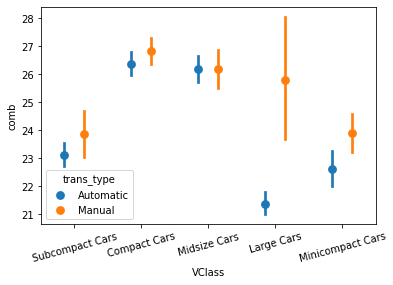

In [7]:
ax = sb.pointplot(data = df, x = 'VClass', y = 'comb', hue = 'trans_type',
                  linestyles = "",dodge = 0.3)
plt.xticks(rotation=15);

##  Line plot 
 a line plot can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. 

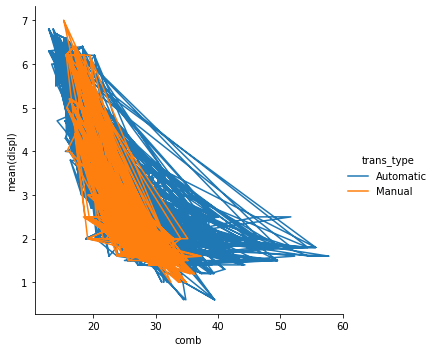

In [8]:
g = sb.FacetGrid(data = df, hue = 'trans_type', height = 5)
g.map(plt.errorbar, "comb", "displ")
g.set_ylabels('mean(displ)')
g.add_legend();

 In this case as well, we create a custom function to send to a `FacetGrid` object's `map` function that computes the means in each bin, then plots them as lines via errorbar.

In [9]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    plt.errorbar(x = bin_centers, y = means, **kwargs)

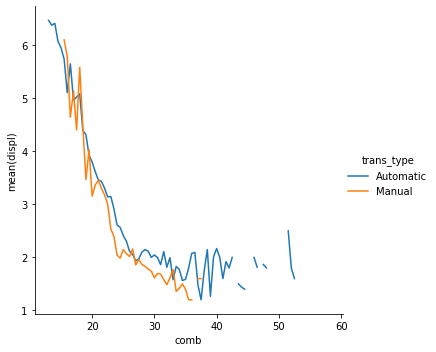

In [10]:
bin_edges = np.arange(0.25, df['comb'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'trans_type', height = 5)
g.map(mean_poly, "comb", "displ",bins=bin_edges)
g.set_ylabels('mean(displ)')
g.add_legend();

# 2D-Hist (Heat map)
If we want to depict the `mean` of a third variable in a `2-d histogram`, we need to change the `weights` of points in the `hist2d` function similar to how we changed the `weights` in the `1-d histogram`.

In [11]:
xbin_edges = np.arange(0.6, 7+0.3, 0.3)
ybin_edges = np.arange(12,58+3, 3)

### Plot the data without calculating weights  
No parameter `weights` here. So, by default it's =1 , and the color represents counts.

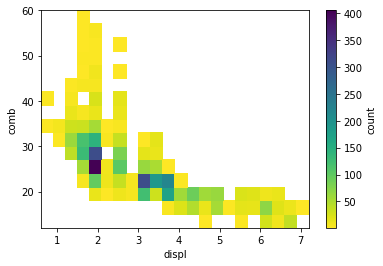

In [12]:
plt.hist2d(data = df, x = 'displ', y = 'comb',
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('displ')
plt.ylabel('comb');
plt.colorbar(label = 'count');

Lets represent average of a third variable instead. In this case. `co2`.

Will make it `co2` value, divided by the number of cars in that bin.

### Work with bins
Figure out in which bin each point falls; using `cut()`

In [13]:
xbin_idxs = pd.cut(df['displ'], xbin_edges, right = False,
                    include_lowest = False, labels = False).astype(int)
ybin_idxs = pd.cut(df['comb'], ybin_edges, right = False,
                    include_lowest = False, labels = False).astype(int)

Count number of points in each bin; using `groupby` and `size`

In [14]:
pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size() #hard to work with

Easier way; Use `reset_index()` and `pivot` to put the count in an array form, and `.values` attribute to get the number of points as array.

In [15]:
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'displ', columns = 'comb').values
pts_per_bin

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

## Change the weight

Now, using all of these values, we can get our points weights. 

We take the co2 series, and devide each element by the number of points in each bin

In [16]:
z_wts = df['co2'] / pts_per_bin[xbin_idxs, ybin_idxs]
z_wts

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

## Plot

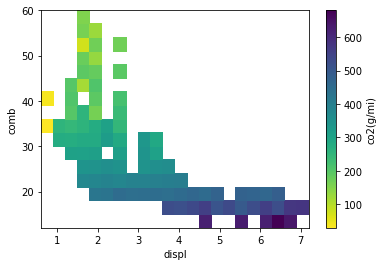

In [17]:
# plot the data using the calculated weights
plt.hist2d(data = df, x = 'displ', y = 'comb', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('displ')
plt.ylabel('comb');
plt.colorbar(label = 'co2(g/mi)');

# 2D- barchart
The code for the `2-d bar chart` doesn't actually change much. The actual `heatmap` call is still the same, only the aggregation of values changes. Instead of taking `size` after the `groupby` operation, we compute the `mean` across dataframe columns and isolate the column of interest.

In [18]:
cat_means = df.groupby(['VClass', 'trans_type']).mean()['displ']
cat_means = cat_means.reset_index(name = 'displ_avg')
cat_means = cat_means.pivot(index = 'trans_type', columns = 'VClass',
                            values = 'displ_avg')

In [19]:
cat_means

VClass,Compact Cars,Large Cars,Midsize Cars,Minicompact Cars,Subcompact Cars
trans_type,,,,,
Automatic,2.613520,3.786612,2.957432,3.332447,3.089841
Manual,2.152367,2.405000,2.569849,2.787970,2.880702


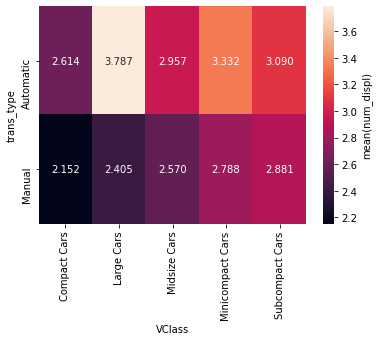

In [20]:
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_displ)'});

### Plot `city` vs. `highway` fuel efficiencies for each vehicle class `VClass`.

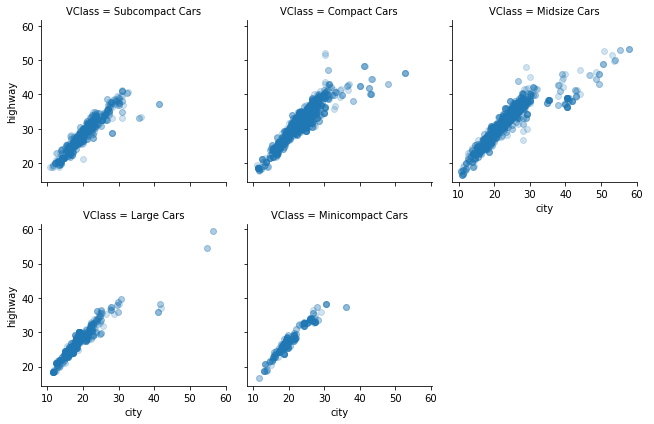

In [21]:
g = sb.FacetGrid(data=df,col='VClass',col_wrap=3)
g.map(plt.scatter,'city','highway', alpha = 1/5)
g.add_legend(); 

The minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

## Plot a relationship 
between engine size `displ` in meters, `vehicle class`, and `fuel type`; only on Premium Gasoline and Regular Gasoline cars

In [22]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 
                 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses)

In [23]:
df_sub = df.loc[df['fuelType'].isin
                              (['Premium Gasoline', 'Regular Gasoline'])]

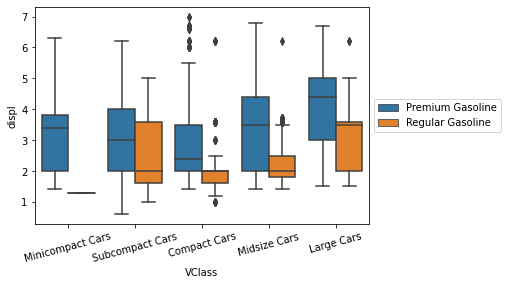

In [24]:
sb.boxplot(data = df_sub, x = 'VClass', y = 'displ', hue = 'fuelType')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15);

in each vehicle class, **engine sizes were larger** for **premium-fuel** cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

# Plot Matrices
Where each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with `faceting`, where rows and columns will subset the data, and the same variables are depicted in each subplot.

In [25]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


## `sb.PairGrid` 
Seaborn's `PairGrid` class facilitates the creation of this kind of plot matrix.

In [26]:
pkmn_stats = ['hp','attack','defense','speed','special-attack','special-defense']
#if we didn't specify var parameter, default is all numirc vars.

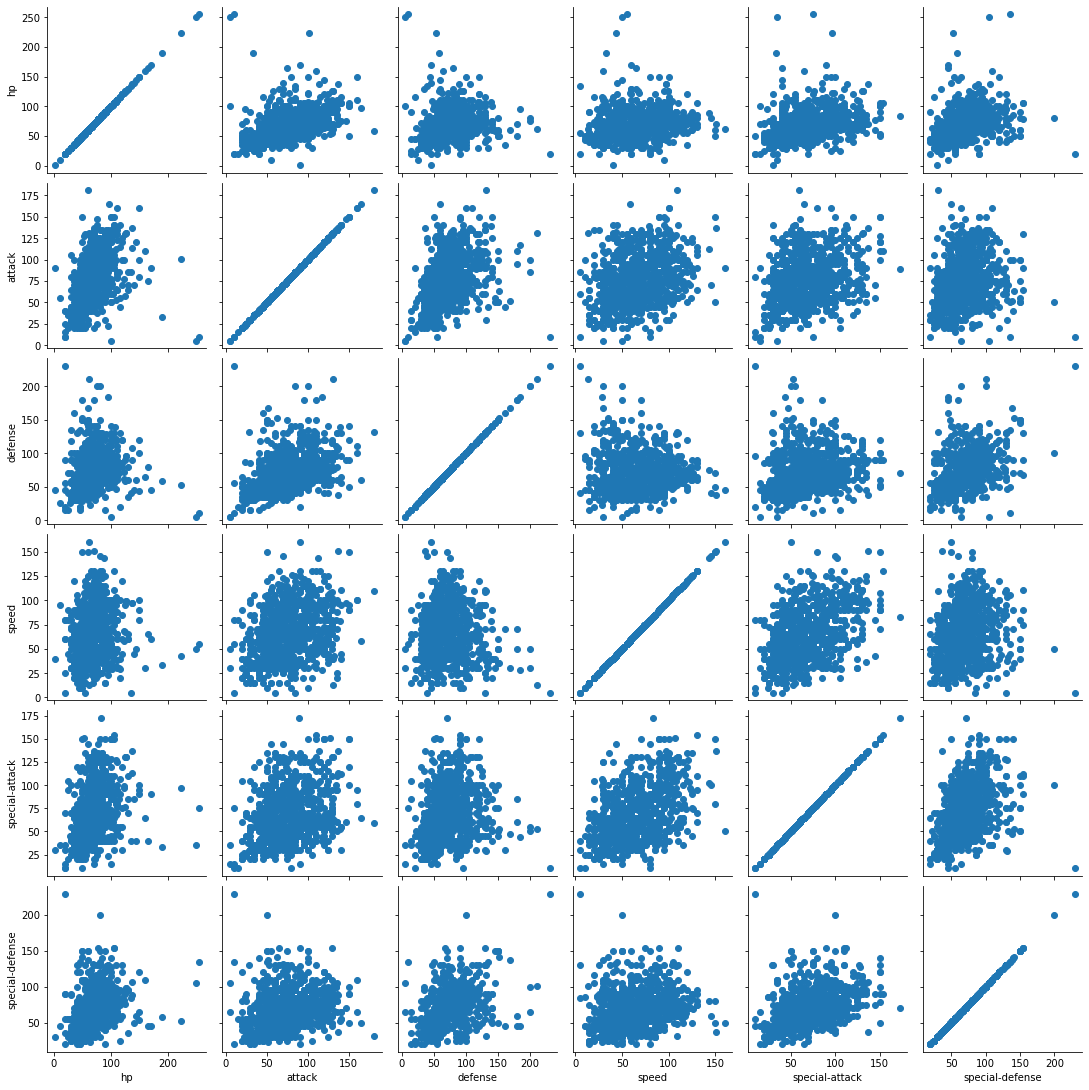

In [27]:
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map(plt.scatter);

Note the diagonal are lines, since col and row variables match up! To put histogram in the diagonal, will use `map_diag()` to plot histogram in the diagonal. and the othes are with  `map_offdiag()`

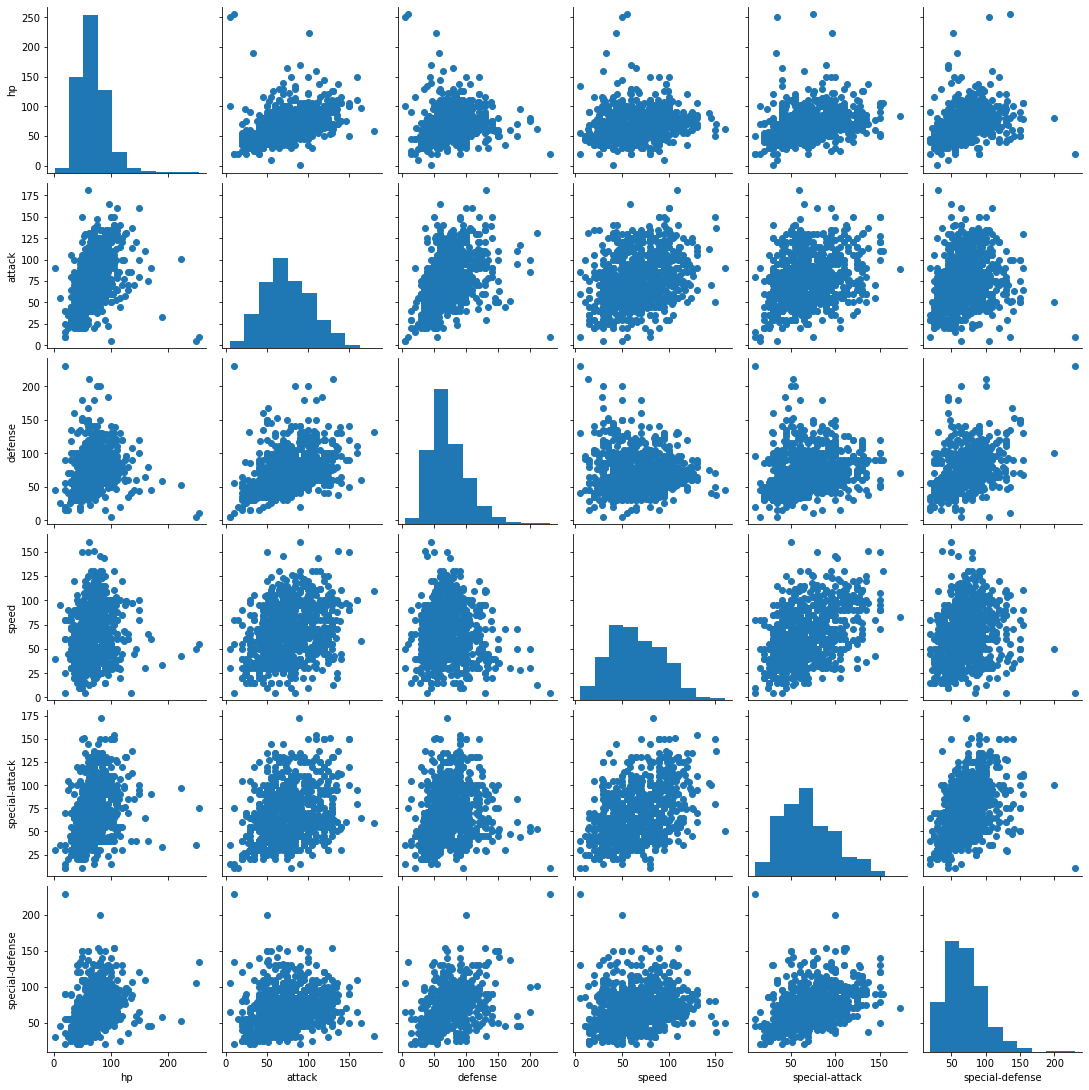

In [28]:
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

One may wonder, the `pairplot function` can also be used to render this common use case in a single call! in fact, for other relationships, the flexibility of `PairGrid` shines. For example, if we want to look at the relationship between the **numeric** and **categorical** variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

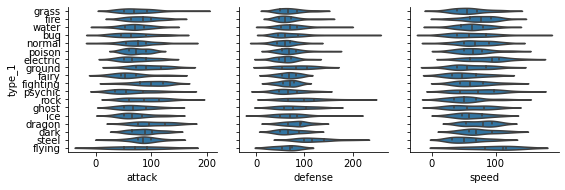

In [29]:
g = sb.PairGrid(data = pokemon, x_vars = ['attack', 'defense', 'speed'],
                y_vars = 'type_1')
g.map(sb.violinplot, inner = 'quartile');

Due to the above noise, one recommended approach is to **take a random subset** of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

# Correlation Matrices

We see lots of strong relations, lets check that **numerically** using correlation `heatmap`. For numeric variables, it can be useful to create a correlation matrix as part of our exploration. 

In [30]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


While it's true that the `.corr` function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a `heat map` to make it easier to see the strength of the relationships. So, to produce the desired visualization:

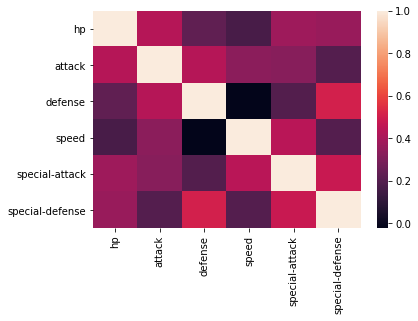

In [31]:
sb.heatmap(pokemon[pkmn_stats].corr());

Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0. That way, we can use `hue` to tell if a correlation is **positive** or **negative**, and see its **strength** from the `hue`'s intensity.

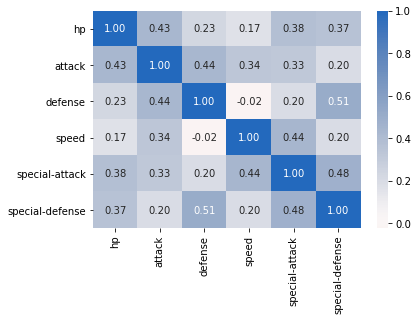

In [32]:
sb.heatmap(pokemon[pkmn_stats].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Since there is a one negative relation between speed and defense, we can set `vmin=0` to set the lower bound of the color map to zero.

## Correlation statistic might be misleading
Don't forget that correlations are computed based on strength of **linear relationship**. 

**Compare** the correlation between some numeric variables to the corresponding cell in the first plot matrix as an example of how a ***correlation statistic might be misleading***.

The correlation heatmap support the observation we made from the plot metrics, we see that there is a relatively high correlation values between `hp` and `attack` , `attack` and `defense`, and `special-attack` and `special-defense` again.

However, there is a new suprising high-correlation between `defense` and `special-defense`! Looking back in the plot metrics, perhaps that the outlier in the upper-right is boosting the statistic. That point needs further investigation in a deeper dive.

# Feature Engineering
Feature engineering is all about creating a new variable with **a sum, difference, product, or ratio** between original variables that may lend a **better insight** into the research questions we seek to answer.

#### For example
If e have one variable that gives a **count of crime incidents**, and a second one that gives **population totals**, then we may want to engineer a new variable by **dividing** the former by the latter, obtaining an **incident rate**.

This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

#### Another way 
that we can perform feature engineering is to use the `cut` function to **divide** a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings.

#### For example
we might `facet plots` by bins of a numeric variable, (or) use **discrete** color bins rather than a **continuous** color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data.

Of course, the bins ***might also mislead** if they're spaced improperly;)

## Check Biase

Check for biases in `pokemon` creatures statistics. 
- Are creatures **offensive stats** are biased twoards **physical or special attack**; if there **defensive stats** are similarly biased towards **physical or special defense**?

#### Offensive stats

In [33]:
pokemon['atck_ratio'] = pokemon['attack'] / pokemon['special-attack']
# if creture has a value >1 ; then they favour the physical side
# elseif creture has a value <1 ; they favour the special side

#### Defensive  stats

In [34]:
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

#### Plot

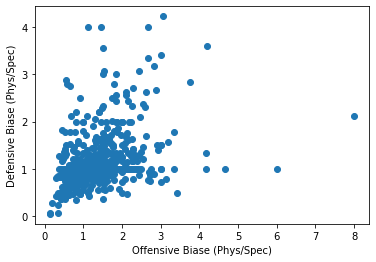

In [35]:
plt.scatter(data=pokemon,x='atck_ratio',y='def_ratio')
plt.xlabel('Offensive Biase (Phys/Spec)')
plt.ylabel('Defensive Biase (Phys/Spec)');

Adding transparancy and change to log scale; so that the biase of two to one is evenly spaced from the even ratio of one, in both the physical and special directions.

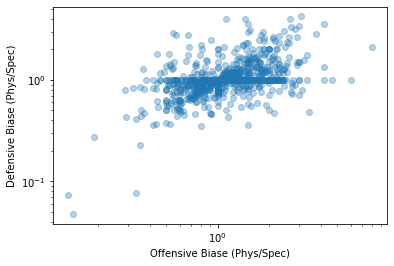

In [36]:
plt.scatter(data=pokemon,x='atck_ratio',y='def_ratio',alpha =1/3)
plt.xlabel('Offensive Biase (Phys/Spec)')
plt.ylabel('Defensive Biase (Phys/Spec)')
plt.xscale('log')
plt.yscale('log');

Adding tickmarks appropriate for a log scale:

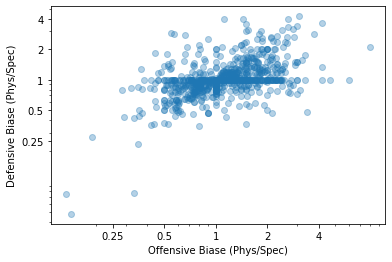

In [37]:
plt.scatter(data=pokemon,x='atck_ratio',y='def_ratio',alpha =1/3)
plt.xlabel('Offensive Biase (Phys/Spec)')
plt.ylabel('Defensive Biase (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [.25,.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc);

Set the axis limits to remove the extreme outliers, and center the plot on 1 in both axises:

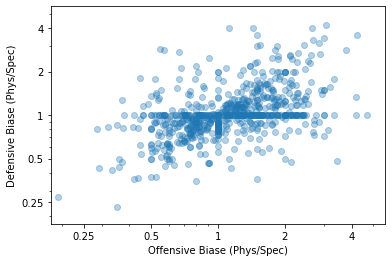

In [38]:
plt.scatter(data=pokemon,x='atck_ratio',y='def_ratio',alpha =1/3)
plt.xlabel('Offensive Biase (Phys/Spec)')
plt.ylabel('Defensive Biase (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [.25,.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc)
plt.xlim(2**-2.5,2**2.5)
plt.ylim(2**-2.5,2**2.5);

In the final plot, we see that most points seem to fall along a diagonal line.<br>
In the upper right-hand quadrant, we have pokeomn pecies that are physical biased in both offense and defense. <br> And in the lower left-hand quadrant, they are special biased in both offense and defense.<br>

Interstengly, there apperes to be a large number of Pokemon on the y one line showing no defensive bias. These Pokemon have a wide range of offensive biases.

There appered to be much fewer Pokemon on the x equals one line showing no offensive bias.

Findings like these, would be difficult to come by and summerize if we didn't build our engineered features.

# Other examples

Creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'.

Are there any interesting relationships that weren't highlighted previously?

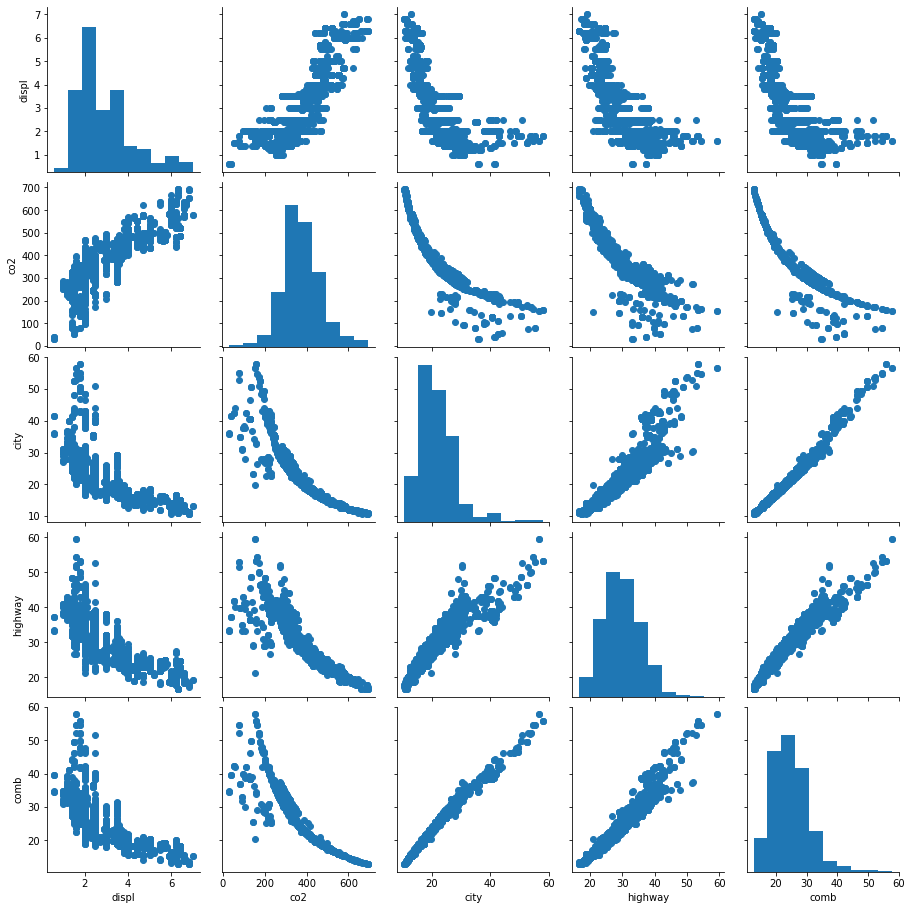

In [39]:
fuel_econ = pd.read_csv('fuel-econ.csv')
var = ['displ', 'co2', 'city', 'highway', 'comb']
g = sb.PairGrid(data = fuel_econ, vars = var)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are. Will be more clear next.

The output of the preceding task pointed out a potentially interesting relationship between `co2` emissions and overall `fuel efficiency`.

- Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) 

- Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [40]:
fuel_econ['co2_per_gal'] = fuel_econ['co2']*fuel_econ['comb']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].
                              isin(['Premium Gasoline','Regular Gasoline','Diesel'])]

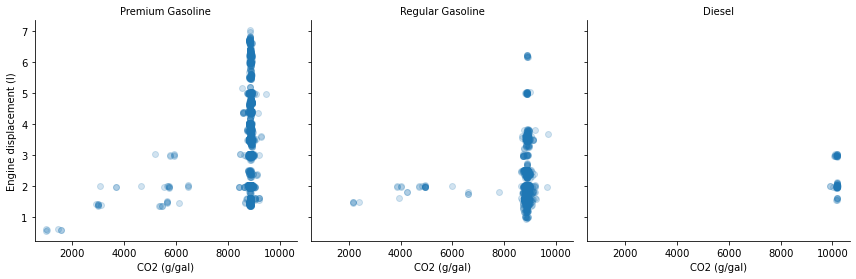

In [42]:
g = sb.FacetGrid(data = fuel_econ_sub, col = 'fuelType', height = 4,
                     col_wrap = 3)
g.map(sb.regplot,'co2_per_gal','displ',y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/5});

g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}');

Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot.

We can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas.

Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon.This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. 

If we inspect these points more closely we'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.

# Conclusion
it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.